In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math
pickle_in = open("data_3class.pkl","rb")
data3 = pickle.load(pickle_in)
train_X = data3['train'][0]
train_Y = data3['train'][1]
test_X = data3['test'][0]
test_Y = data3['test'][1]

iteration 0: loss 1.099346
iteration 10: loss 1.098632
iteration 20: loss 1.098553
iteration 30: loss 1.098474
iteration 40: loss 1.098393
iteration 50: loss 1.098308
iteration 60: loss 1.098218
iteration 70: loss 1.098123
iteration 80: loss 1.098019
iteration 90: loss 1.097906
iteration 100: loss 1.097781
iteration 110: loss 1.097644
iteration 120: loss 1.097491
iteration 130: loss 1.097321
iteration 140: loss 1.097130
iteration 150: loss 1.096915
iteration 160: loss 1.096674
iteration 170: loss 1.096402
iteration 180: loss 1.096095
iteration 190: loss 1.095749
iteration 200: loss 1.095357
iteration 210: loss 1.094915
iteration 220: loss 1.094414
iteration 230: loss 1.093847
iteration 240: loss 1.093207
iteration 250: loss 1.092482
iteration 260: loss 1.091662
iteration 270: loss 1.090736
iteration 280: loss 1.089690
iteration 290: loss 1.088509
iteration 300: loss 1.087176
iteration 310: loss 1.085675
iteration 320: loss 1.083986
iteration 330: loss 1.082087
iteration 340: loss 1.079

iteration 2770: loss 0.738368
iteration 2780: loss 0.738365
iteration 2790: loss 0.738363
iteration 2800: loss 0.738360
iteration 2810: loss 0.738357
iteration 2820: loss 0.738355
iteration 2830: loss 0.738352
iteration 2840: loss 0.738349
iteration 2850: loss 0.738346
iteration 2860: loss 0.738344
iteration 2870: loss 0.738341
iteration 2880: loss 0.738338
iteration 2890: loss 0.738335
iteration 2900: loss 0.738333
iteration 2910: loss 0.738330
iteration 2920: loss 0.738327
iteration 2930: loss 0.738325
iteration 2940: loss 0.738322
iteration 2950: loss 0.738319
iteration 2960: loss 0.738316
iteration 2970: loss 0.738314
iteration 2980: loss 0.738311
iteration 2990: loss 0.738308
iteration 3000: loss 0.738306
iteration 3010: loss 0.738303
iteration 3020: loss 0.738300
iteration 3030: loss 0.738297
iteration 3040: loss 0.738295
iteration 3050: loss 0.738292
iteration 3060: loss 0.738289
iteration 3070: loss 0.738287
iteration 3080: loss 0.738284
iteration 3090: loss 0.738281
iteration 

iteration 5510: loss 0.737643
iteration 5520: loss 0.737640
iteration 5530: loss 0.737637
iteration 5540: loss 0.737635
iteration 5550: loss 0.737632
iteration 5560: loss 0.737629
iteration 5570: loss 0.737627
iteration 5580: loss 0.737624
iteration 5590: loss 0.737621
iteration 5600: loss 0.737619
iteration 5610: loss 0.737616
iteration 5620: loss 0.737613
iteration 5630: loss 0.737611
iteration 5640: loss 0.737608
iteration 5650: loss 0.737605
iteration 5660: loss 0.737603
iteration 5670: loss 0.737600
iteration 5680: loss 0.737598
iteration 5690: loss 0.737595
iteration 5700: loss 0.737592
iteration 5710: loss 0.737590
iteration 5720: loss 0.737587
iteration 5730: loss 0.737584
iteration 5740: loss 0.737582
iteration 5750: loss 0.737579
iteration 5760: loss 0.737576
iteration 5770: loss 0.737574
iteration 5780: loss 0.737571
iteration 5790: loss 0.737568
iteration 5800: loss 0.737565
iteration 5810: loss 0.737563
iteration 5820: loss 0.737560
iteration 5830: loss 0.737557
iteration 

iteration 8250: loss 0.736815
iteration 8260: loss 0.736811
iteration 8270: loss 0.736808
iteration 8280: loss 0.736804
iteration 8290: loss 0.736800
iteration 8300: loss 0.736796
iteration 8310: loss 0.736793
iteration 8320: loss 0.736789
iteration 8330: loss 0.736785
iteration 8340: loss 0.736781
iteration 8350: loss 0.736777
iteration 8360: loss 0.736774
iteration 8370: loss 0.736770
iteration 8380: loss 0.736766
iteration 8390: loss 0.736762
iteration 8400: loss 0.736758
iteration 8410: loss 0.736755
iteration 8420: loss 0.736751
iteration 8430: loss 0.736747
iteration 8440: loss 0.736743
iteration 8450: loss 0.736739
iteration 8460: loss 0.736735
iteration 8470: loss 0.736731
iteration 8480: loss 0.736727
iteration 8490: loss 0.736723
iteration 8500: loss 0.736719
iteration 8510: loss 0.736716
iteration 8520: loss 0.736712
iteration 8530: loss 0.736708
iteration 8540: loss 0.736704
iteration 8550: loss 0.736700
iteration 8560: loss 0.736696
iteration 8570: loss 0.736692
iteration 

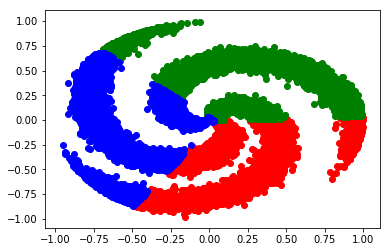

test accuracy: 0.53


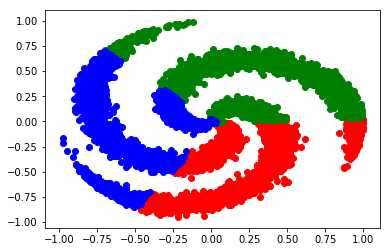

Training Error Plot


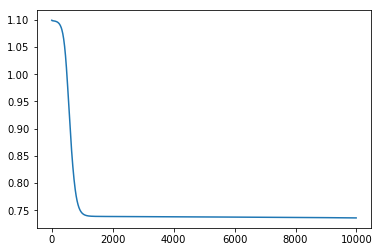

In [34]:
def sigmoid(x):
    ans = 1+np.exp(-1*x)
    return(1/ans)
    
#gradient of sigmoid is f(x)(1-f(x))

# initialize parameters randomly
D=2
K=3
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))#bias from input to hidden layer
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))#bias from hidden to output layer

step_size = 0.2
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(10000):
  
    #Forward
    hidden_layer = sigmoid(np.dot(train_X, W) + b) # Sigmoid activation
    scores = np.dot(hidden_layer, W2) + b2
  
    # compute the class probabilities - softmax
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # Average cross-entropy loss 
    cross_entropy = -np.log(probs[range(num_examples),train_Y])
    loss = np.sum(cross_entropy)/num_examples
  
    if(i % 10 == 0):
        print("iteration %d: loss %f" % (i, loss))
        loss_plot.append(loss)
        x_plot.append(i)
  
  # gradients
    dscores = probs
    dscores[range(num_examples),train_Y] -= 1
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    #print(dhidden)
    # backprop the sigmoid non-linearity
    dhidden = dhidden*sigmoid(hidden_layer)*(1-sigmoid(hidden_layer))
    # finally into W,b
    dW = np.dot(train_X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    
# evaluate training set accuracy
hidden_layer = sigmoid(np.dot(train_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2# evaluate training set accuracy
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(probs, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
class2 = train_X[predicted_classtrain==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()
hidden_layer = sigmoid(np.dot(test_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(probs, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
class2 = test_X[predicted_classtest==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()


print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()

iteration 0: loss 1.130078
iteration 10: loss 1.098282
iteration 20: loss 1.097931
iteration 30: loss 1.097579
iteration 40: loss 1.097228
iteration 50: loss 1.096876
iteration 60: loss 1.096522
iteration 70: loss 1.096168
iteration 80: loss 1.095812
iteration 90: loss 1.095454
iteration 100: loss 1.095094
iteration 110: loss 1.094732
iteration 120: loss 1.094366
iteration 130: loss 1.093998
iteration 140: loss 1.093625
iteration 150: loss 1.093249
iteration 160: loss 1.092869
iteration 170: loss 1.092483
iteration 180: loss 1.092093
iteration 190: loss 1.091698
iteration 200: loss 1.091297
iteration 210: loss 1.090889
iteration 220: loss 1.090475
iteration 230: loss 1.090055
iteration 240: loss 1.089627
iteration 250: loss 1.089191
iteration 260: loss 1.088747
iteration 270: loss 1.088294
iteration 280: loss 1.087832
iteration 290: loss 1.087361
iteration 300: loss 1.086879
iteration 310: loss 1.086387
iteration 320: loss 1.085884
iteration 330: loss 1.085370
iteration 340: loss 1.084

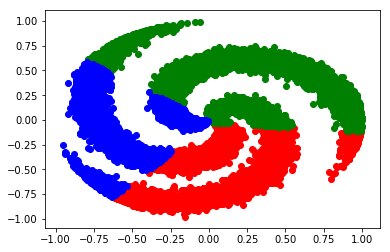

test accuracy: 0.52


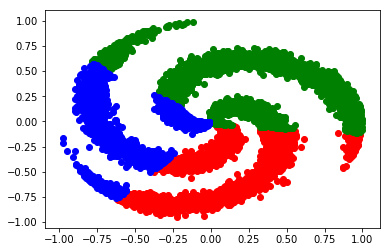

Training Error Plot


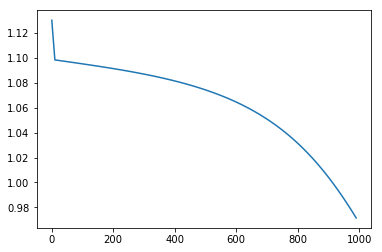

In [36]:
def sigmoid(x):
    ans = 1+np.exp(-1*x)
    return(1/ans)
# initialize parameters randomly
D=2
K=3
h1 = 100 # size of hidden layer 1
h2 = 100 #size of hidden layer 2
W = 0.1 * np.random.randn(D,h1)
b = np.zeros((1,h1))#bias from input to hidden layer 1
W2 = 0.1 * np.random.randn(h1,h2)
b2 = np.zeros((1,h2))#bias from hidden layer 1 to hidden layer 2
W3 = 0.1 * np.random.randn(h2,K)
b3 = np.zeros((1,K))#bias from hidden layer 2 to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(1000):
  
    #Forward
    hidden_layer1 = sigmoid(np.dot(train_X, W) + b) # sigmoid activation
    hidden_layer2 = sigmoid(np.dot(hidden_layer1, W2) + b2) # sigmoid activation
    scores = np.dot(hidden_layer2, W3) + b3
  
    # compute the class probabilities - softmax
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # Average cross-entropy loss 
    cross_entropy = -np.log(probs[range(num_examples),train_Y])
    loss = np.sum(cross_entropy)/num_examples
  
    if i % 10 == 0:
        print("iteration %d: loss %f" % (i, loss))
        x_plot.append(i)
        loss_plot.append(loss)
    # gradients
    dscores = probs
    dscores[range(num_examples),train_Y] -= 1
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW3 = np.dot(hidden_layer2.T, dscores)
    db3 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden2 = np.dot(dscores, W3.T)
    # backprop the sigmoid non-linearity
    dhidden2 = dhidden2*sigmoid(hidden_layer2)*(1-sigmoid(hidden_layer2))
    dW2 = np.dot(hidden_layer1.T,dhidden2)
    db2 = np.sum(dhidden2, axis=0, keepdims=True)
    
    # next backprop into hidden layer 1
    dhidden1 = np.dot(dhidden2, W2.T)
    # backprop the sigmoid non-linearity
    dhidden1 = dhidden1*sigmoid(hidden_layer1)*(1-sigmoid(hidden_layer1))
    # finally into W,b
    dW = np.dot(train_X.T, dhidden1)
    db = np.sum(dhidden1, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    W3 += -step_size * dW3
    b3 += -step_size * db3
# evaluate training set accuracy
hidden_layer1 = sigmoid(np.dot(train_X, W) + b) 
hidden_layer2 = sigmoid(np.dot(hidden_layer1, W2) + b2)
scores = np.dot(hidden_layer2, W3) + b3
# compute the class probabilities - softmax
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(probs, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
class2 = train_X[predicted_classtrain==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()
hidden_layer1 = sigmoid(np.dot(test_X, W) + b) 
hidden_layer2 = sigmoid(np.dot(hidden_layer1, W2) + b2) 
scores = np.dot(hidden_layer2, W3) + b3
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(probs, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
class2 = test_X[predicted_classtest==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()    

print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()


In [37]:
pickle_in = open("data_2class.pkl","rb")
data2 = pickle.load(pickle_in)
train_X = data2['train'][0]
train_Y = data2['train'][1]
test_X = data2['test'][0]
test_Y = data2['test'][1]

iteration 0: loss 0.697072
iteration 10: loss 1.105804
iteration 20: loss 1.094962
iteration 30: loss 1.084293
iteration 40: loss 1.073834
iteration 50: loss 1.063578
iteration 60: loss 1.053520
iteration 70: loss 1.043655
iteration 80: loss 1.033974
iteration 90: loss 1.024469
iteration 100: loss 1.015131
iteration 110: loss 1.005950
iteration 120: loss 0.996912
iteration 130: loss 0.988003
iteration 140: loss 0.979207
iteration 150: loss 0.970502
iteration 160: loss 0.961866
iteration 170: loss 0.953269
iteration 180: loss 0.944678
iteration 190: loss 0.936052
iteration 200: loss 0.927346
iteration 210: loss 0.918500
iteration 220: loss 0.909447
iteration 230: loss 0.900106
iteration 240: loss 0.890379
iteration 250: loss 0.880151
iteration 260: loss 0.869285
iteration 270: loss 0.857617
iteration 280: loss 0.844958
iteration 290: loss 0.831084
iteration 300: loss 0.815741
iteration 310: loss 0.798642
iteration 320: loss 0.779473
iteration 330: loss 0.757907
iteration 340: loss 0.733

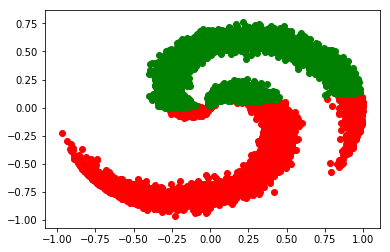

test accuracy: 0.71


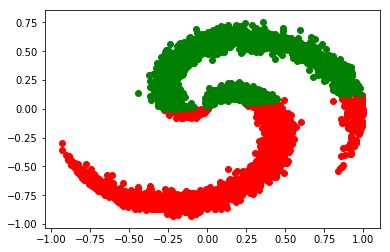

Training Error Plot


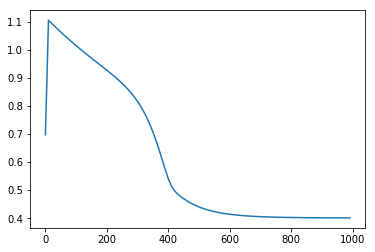

In [38]:
def sigmoid(x):
    ans = 1+np.exp(-1*x)
    return(1/ans)
    
#gradient of sigmoid is f(x)(1-f(x))

# initialize parameters randomly
D=2
K=2
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))#bias from input to hidden layer
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))#bias from hidden to output layer

step_size = 0.2
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(1000):
  
    #Forward
    hidden_layer = sigmoid(np.dot(train_X, W) + b) # Sigmoid activation
    scores = np.dot(hidden_layer, W2) + b2
  
    # compute the class probabilities - softmax
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # Average cross-entropy loss 
    cross_entropy = -np.log(probs[range(num_examples),train_Y])
    loss = np.sum(cross_entropy)/num_examples
  
    if(i % 10 == 0):
        print("iteration %d: loss %f" % (i, loss))
        loss_plot.append(loss)
        x_plot.append(i)
  
  # gradients
    dscores = probs
    dscores[range(num_examples),train_Y] -= 1
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    #print(dhidden)
    # backprop the sigmoid non-linearity
    dhidden = dhidden*sigmoid(hidden_layer)*(1-sigmoid(hidden_layer))
    # finally into W,b
    dW = np.dot(train_X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    
# evaluate training set accuracy
hidden_layer = sigmoid(np.dot(train_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2# evaluate training set accuracy
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(probs, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()
hidden_layer = sigmoid(np.dot(test_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(probs, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()


print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()

iteration 0: loss 1.126340
iteration 10: loss 0.703685
iteration 20: loss 0.694525
iteration 30: loss 0.692503
iteration 40: loss 0.690893
iteration 50: loss 0.705615
iteration 60: loss 0.703255
iteration 70: loss 0.686203
iteration 80: loss 0.681663
iteration 90: loss 0.726011
iteration 100: loss 0.677420
iteration 110: loss 0.665723
iteration 120: loss 0.697429
iteration 130: loss 0.640149
iteration 140: loss 0.660777
iteration 150: loss 0.624176
iteration 160: loss 0.583780
iteration 170: loss 0.576426
iteration 180: loss 0.514502
iteration 190: loss 0.489389
iteration 200: loss 0.463116
iteration 210: loss 0.443508
iteration 220: loss 0.435006
iteration 230: loss 0.428940
iteration 240: loss 0.423045
iteration 250: loss 0.418544
iteration 260: loss 0.415583
iteration 270: loss 0.413547
iteration 280: loss 0.411919
iteration 290: loss 0.410480
iteration 300: loss 0.409210
iteration 310: loss 0.408146
iteration 320: loss 0.407304
iteration 330: loss 0.406671
iteration 340: loss 0.406

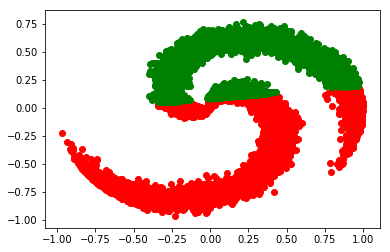

test accuracy: 0.75


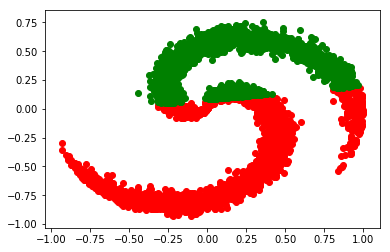

Training Error Plot


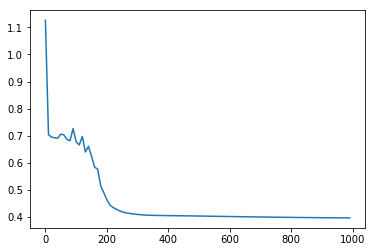

In [39]:
def sigmoid(x):
    ans = 1+np.exp(-1*x)
    return(1/ans)
# initialize parameters randomly
D=2
K=3
h1 = 100 # size of hidden layer 1
h2 = 100 #size of hidden layer 2
W = 0.1 * np.random.randn(D,h1)
b = np.zeros((1,h1))#bias from input to hidden layer 1
W2 = 0.1 * np.random.randn(h1,h2)
b2 = np.zeros((1,h2))#bias from hidden layer 1 to hidden layer 2
W3 = 0.1 * np.random.randn(h2,K)
b3 = np.zeros((1,K))#bias from hidden layer 2 to output layer

step_size = 1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(1000):
  
    #Forward
    hidden_layer1 = sigmoid(np.dot(train_X, W) + b) # sigmoid activation
    hidden_layer2 = sigmoid(np.dot(hidden_layer1, W2) + b2) # sigmoid activation
    scores = np.dot(hidden_layer2, W3) + b3
  
    # compute the class probabilities - softmax
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # Average cross-entropy loss 
    cross_entropy = -np.log(probs[range(num_examples),train_Y])
    loss = np.sum(cross_entropy)/num_examples
  
    if i % 10 == 0:
        print("iteration %d: loss %f" % (i, loss))
        x_plot.append(i)
        loss_plot.append(loss)
    # gradients
    dscores = probs
    dscores[range(num_examples),train_Y] -= 1
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW3 = np.dot(hidden_layer2.T, dscores)
    db3 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden2 = np.dot(dscores, W3.T)
    # backprop the sigmoid non-linearity
    dhidden2 = dhidden2*sigmoid(hidden_layer2)*(1-sigmoid(hidden_layer2))
    dW2 = np.dot(hidden_layer1.T,dhidden2)
    db2 = np.sum(dhidden2, axis=0, keepdims=True)
    
    # next backprop into hidden layer 1
    dhidden1 = np.dot(dhidden2, W2.T)
    # backprop the sigmoid non-linearity
    dhidden1 = dhidden1*sigmoid(hidden_layer1)*(1-sigmoid(hidden_layer1))
    # finally into W,b
    dW = np.dot(train_X.T, dhidden1)
    db = np.sum(dhidden1, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    W3 += -step_size * dW3
    b3 += -step_size * db3
# evaluate training set accuracy
hidden_layer1 = sigmoid(np.dot(train_X, W) + b) 
hidden_layer2 = sigmoid(np.dot(hidden_layer1, W2) + b2)
scores = np.dot(hidden_layer2, W3) + b3
# compute the class probabilities - softmax
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(probs, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()
hidden_layer1 = sigmoid(np.dot(test_X, W) + b) 
hidden_layer2 = sigmoid(np.dot(hidden_layer1, W2) + b2) 
scores = np.dot(hidden_layer2, W3) + b3
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(probs, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()    

print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()
